# Evaluating Experiment Results

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Functions

In [267]:
def _polynomial_regression(data, degree):
    """ 
    Function to fit the loss curve to a polynomial function.
    Args:
        - data (Series): the loss values to be fit
        - degree (int): the amount of fitting
    Returns:
        - (Series): the values of the fitted curve
    """
    coefficients = np.polyfit(data.index, data.values, degree)

    return np.polyval(coefficients, data.index)

In [268]:
def get_fitted_curve(df, col_name, degree=20, cutoff=-50, plot=False):
    """ 
    Function to get the fitted curve and plot it if needed.
    Args:
        - df (DataFrame): experiment results dataframe
        - col_name (str): name of the column containing the loss (train/val)
        - degree (int): the amount of fitting 
        - cutoff (int): when to stop fitting to prevent overfitting
        - plot (Boolean): whether to plot the fitted curve
    Returns:
        - fitted_curve (Series): the values of the fitted curve
    """
    loss = df[col_name]

    # loss curve trend
    fitted_curve = _polynomial_regression(loss, degree)

    # plotting fit
    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(loss[:cutoff], label="Loss Curve")
        plt.plot(fitted_curve[:cutoff], label="Polynomial Fit")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss Curve and Polynomial Fit")
        plt.show()

    return fitted_curve

In [269]:
def get_variance(df, col_name, fitted_curve, cutoff=150, plot=False):
    """ 
    Function to get the variance of the detrended loss cover.
    Args:
        - df (DataFrame): experiment results dataframe
        - col_name (str): name of the column containing the loss (train/val)
        - cutoff (int): when to stop fitting to prevent inaccuracte calculations
        - plot (Boolean): whether to plot the detrended loss curve
    Returns:
        - variance (float): the variance of the detrended loss curve
    """
    detrended = df[col_name][:cutoff] - fitted_curve[:cutoff]

    # plotting fit
    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(detrended[:cutoff])
        plt.axhline(0, linestyle='--', color='red', lw=0.5)
        plt.xlabel("Epochs")
        plt.ylabel("Detrended Loss")
        plt.title("Detrended Loss Curve")
        plt.show()
    
    # calculate varinace
    variance = np.std(detrended[:cutoff]) ** 2

    return variance

Calculations

In [270]:
# dictionaries to store results
MSE_train_dict = {'Lookahead': None,
                  'Adam': None,
                  'SGD': None,
                  'ADAgrad': None,
                  'ADAdelta': None,
                  'RMSprop': None}

MSE_val_dict = {'Lookahead': None,
                'Adam': None,
                'SGD': None,
                'ADAgrad': None,
                'ADAdelta': None,
                'RMSprop': None}

In [271]:
lookahead_res = pd.read_csv("results/experiment_LH.csv")
adam_res = pd.read_csv("results/experiment_adam.csv")
SGD_res = pd.read_csv("results/experiment_SGD.csv")
ADAgrad_res = pd.read_csv("results/experiment_adagrad.csv")
ADAdelta_res = pd.read_csv("results/experiment_ADADelta.csv")
RMSprop_res = pd.read_csv("results/experiment_RMSprop.csv")

C:\Users\Eliss\AppData\Local\Temp\ipykernel_6988\480035371.py:10: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(data.index, data.values, degree)


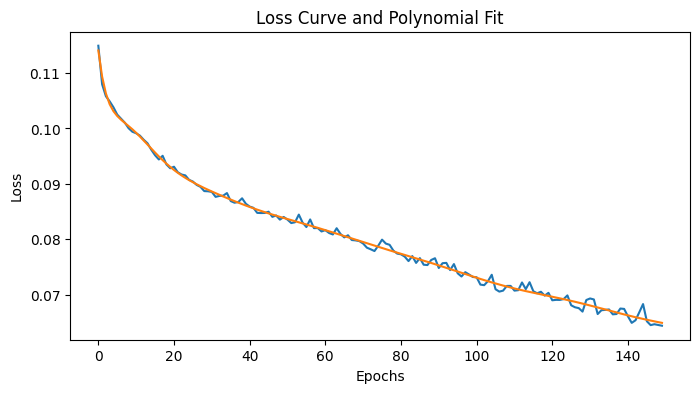

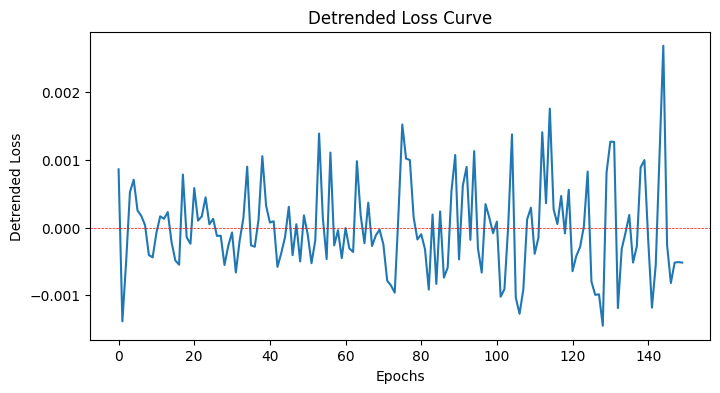

C:\Users\Eliss\AppData\Local\Temp\ipykernel_6988\480035371.py:10: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(data.index, data.values, degree)


In [272]:
LH_fit_train = get_fitted_curve(lookahead_res, 'train_loss', plot=True)
LH_var_train = get_variance(lookahead_res,'train_loss', LH_fit_train, plot=True)

LH_fit_val = get_fitted_curve(lookahead_res, 'val_loss')
LH_var_val = get_variance(lookahead_res,'val_loss', LH_fit_val)

In [273]:
adam_fit_train = get_fitted_curve(adam_res, 'train_loss')
adam_var_train = get_variance(adam_res,'train_loss', adam_fit_train)

adam_fit_val = get_fitted_curve(adam_res, 'train_loss')
adam_var_val= get_variance(adam_res,'train_loss', adam_fit_val)

C:\Users\Eliss\AppData\Local\Temp\ipykernel_6988\480035371.py:10: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(data.index, data.values, degree)
C:\Users\Eliss\AppData\Local\Temp\ipykernel_6988\480035371.py:10: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(data.index, data.values, degree)


In [274]:
SGD_fit_train = get_fitted_curve(SGD_res, 'train_loss')
SGD_var_train = get_variance(SGD_res,'train_loss', SGD_fit_train)

SGD_fit_val = get_fitted_curve(SGD_res, 'train_loss')
SGD_var_val = get_variance(SGD_res,'train_loss', SGD_fit_val)

C:\Users\Eliss\AppData\Local\Temp\ipykernel_6988\480035371.py:10: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(data.index, data.values, degree)
C:\Users\Eliss\AppData\Local\Temp\ipykernel_6988\480035371.py:10: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(data.index, data.values, degree)


In [275]:
adagrad_fit_train = get_fitted_curve(ADAgrad_res, 'train_loss')
adagrad_var_train = get_variance(ADAgrad_res,'train_loss', adagrad_fit_train)

adagrad_fit_val = get_fitted_curve(ADAgrad_res, 'train_loss')
adagrad_var_val = get_variance(ADAgrad_res,'train_loss', adagrad_fit_val)

C:\Users\Eliss\AppData\Local\Temp\ipykernel_6988\480035371.py:10: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(data.index, data.values, degree)
C:\Users\Eliss\AppData\Local\Temp\ipykernel_6988\480035371.py:10: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(data.index, data.values, degree)


In [276]:
adadelta_fit_train = get_fitted_curve(ADAdelta_res, 'train_loss')
adadelta_var_train = get_variance(ADAdelta_res,'train_loss', adadelta_fit_train)

adadelta_fit_val = get_fitted_curve(ADAdelta_res, 'train_loss')
adadelta_var_val = get_variance(ADAdelta_res,'train_loss', adadelta_fit_val)

C:\Users\Eliss\AppData\Local\Temp\ipykernel_6988\480035371.py:10: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(data.index, data.values, degree)
C:\Users\Eliss\AppData\Local\Temp\ipykernel_6988\480035371.py:10: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(data.index, data.values, degree)


In [277]:
RMS_fit_train = get_fitted_curve(RMSprop_res, 'train_loss')
rms_var_train = get_variance(RMSprop_res,'train_loss', RMS_fit_train)

RMS_fit_val = get_fitted_curve(RMSprop_res, 'train_loss')
rms_var_val = get_variance(RMSprop_res,'train_loss', RMS_fit_val)

C:\Users\Eliss\AppData\Local\Temp\ipykernel_6988\480035371.py:10: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(data.index, data.values, degree)
C:\Users\Eliss\AppData\Local\Temp\ipykernel_6988\480035371.py:10: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(data.index, data.values, degree)


Results

In [281]:
MSE_train_dict["Lookahead"] = LH_var_train
MSE_train_dict["Adam"] = adam_var_train
MSE_train_dict["SGD"] = SGD_var_train
MSE_train_dict["ADAgrad"] = adagrad_var_train
MSE_train_dict["ADAdelta"] = adadelta_var_train
MSE_train_dict["RMSprop"] = rms_var_train

sorted(MSE_train_dict.items(), key=lambda item: item[1])

[('SGD', 6.319231422821978e-09),
 ('ADAdelta', 1.0141542456355337e-08),
 ('ADAgrad', 4.325052784123508e-08),
 ('Lookahead', 4.573036994078974e-07),
 ('Adam', 4.6250877114668754e-07),
 ('RMSprop', 5.789284593858445e-07)]

In [282]:
MSE_val_dict["Lookahead"] = LH_var_val
MSE_val_dict["Adam"] = adam_var_val
MSE_val_dict["SGD"] = SGD_var_val
MSE_val_dict["ADAgrad"] = adagrad_var_val
MSE_val_dict["ADAdelta"] = adadelta_var_val
MSE_val_dict["RMSprop"] = rms_var_val

sorted(MSE_val_dict.items(), key=lambda item: item[1])

[('SGD', 6.319231422821978e-09),
 ('ADAdelta', 1.0141542456355337e-08),
 ('ADAgrad', 4.325052784123508e-08),
 ('Adam', 4.6250877114668754e-07),
 ('RMSprop', 5.789284593858445e-07),
 ('Lookahead', 9.437987856949326e-07)]